In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def init_plotting(S0, S1, D0, D1):
    fig, ax = plt.subplots(4, 2, figsize=(15, 15))
    ax = [
        [plt.subplot2grid((4, 2), (0, 0)), plt.subplot2grid((4, 2), (0, 1))],
        [plt.subplot2grid((4, 2), (1, 0)), plt.subplot2grid((4, 2), (1, 1))],
        [plt.subplot2grid((4, 2), (2, 0)), plt.subplot2grid((4, 2), (2, 1))],
        [plt.subplot2grid((4, 2), (3, 0), colspan=2)],
    ]

    ax[0][0].set_title("Lateral trajectories")
    ax[0][0].set_xlabel("t, s")
    ax[0][0].set_ylabel("d, m")
    ax[0][0].axhline(y=D0[0], color='#000000', linewidth=1)
    ax[0][0].axhline(y=D1[0], color='#000000', linewidth=1)
    ax[1][0].set_xlabel("t, s")
    ax[1][0].set_ylabel("d', m/s")
    ax[1][0].axhline(y=D0[1], color='#000000', linewidth=1)
    ax[1][0].axhline(y=D1[1], color='#000000', linewidth=1)
    ax[2][0].set_xlabel("t, s")
    ax[2][0].set_ylabel("d'', m/s^2")
    ax[2][0].axhline(y=D0[2], color='#000000')
    ax[2][0].axhline(y=D1[2], color='#000000')
    ax[0][1].set_title('Longitudinal trajectories')
    ax[0][1].set_xlabel("t, s")
    ax[0][1].set_ylabel("s, m")
    ax[0][1].axhline(y=S0[0], color='#000000', linewidth=1)
    ax[0][1].axhline(y=S1[0], color='#000000', linewidth=1)
    ax[1][1].set_xlabel("t, s")
    ax[1][1].set_ylabel("s', m/s")
    ax[1][1].axhline(y=S0[1], color='#000000', linewidth=1)
    ax[1][1].axhline(y=S1[1], color='#000000', linewidth=1)
    ax[2][1].set_xlabel("t, s")
    ax[2][1].set_ylabel("s'', m/s^2")
    ax[2][1].axhline(y=S0[2], color='#000000', linewidth=1)
    ax[2][1].axhline(y=S1[2], color='#000000', linewidth=1)
    ax[3][0].set_title('Combined trajectory')
    ax[3][0].set_xlabel('s, m')
    ax[3][0].set_ylabel('d, m')
    ax[3][0].set_aspect('equal', adjustable='box')
    return ax

ValueError: x and y must have same first dimension, but have shapes (30,) and (2700,)

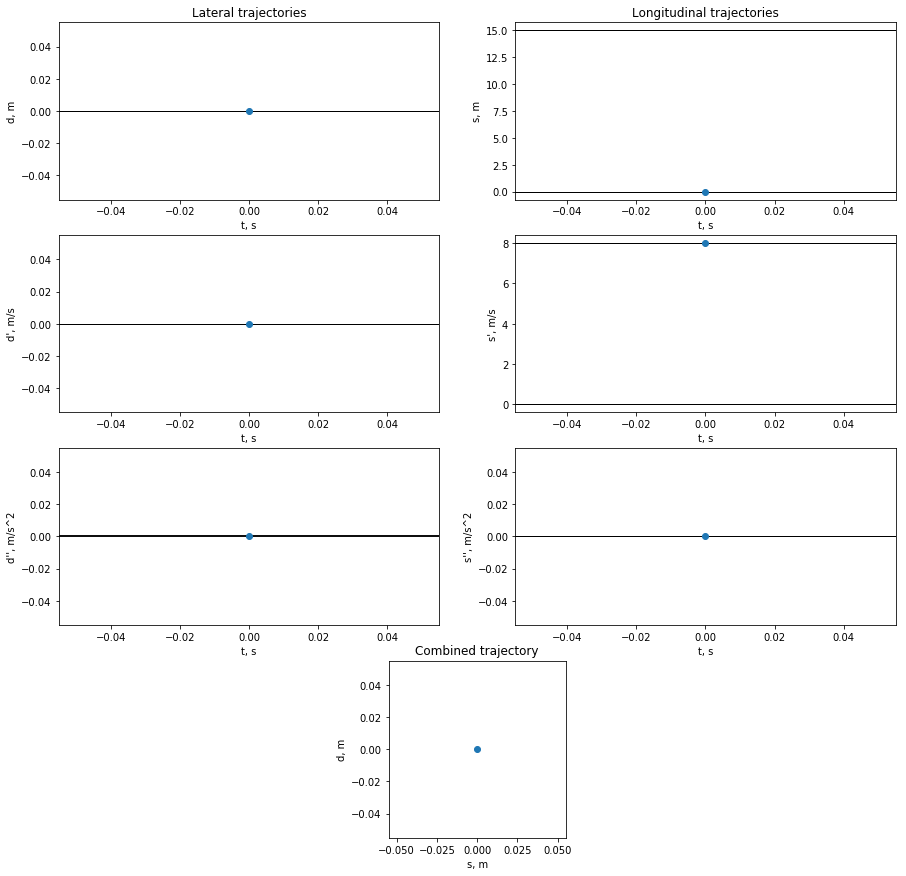

In [77]:
def plot_point(ax, x, y):
    ax.plot([x], [y], marker='o')

def cartesian2d(x, y):
    return np.stack(np.meshgrid(x, y), -1).reshape((-1,2))
    

S0 = np.array([0, 8, 0])
S1 = np.array([15, 0, 0])
D0 = np.array([0, 0, 0])
D1 = np.array([0, 0, 0])
t = 10

ax = init_plotting(S0, S1, D0, D1)

plot_point(ax[0][0], 0, D0[0])
plot_point(ax[1][0], 0, D0[1])
plot_point(ax[2][0], 0, D0[2])

plot_point(ax[0][1], 0, S0[0])
plot_point(ax[1][1], 0, S0[1])
plot_point(ax[2][1], 0, S0[2])

plot_point(ax[3][0], S0[0], D0[0])


n = 30
ds = 5.0
dd = 5.0
dt = 1.0
S1r = np.linspace(S1-ds/2, S1+ds/2, n)
D1r = np.linspace(D1-dd/2, D1+dd/2, n)
tr = np.linspace(t-dt/2, t+dt/2, n)

S1m = cartesian2d(tr, S1r)
#D1m = cartesian2d(tr, D1r)

#ax[0][0].plot(tm, D1m[:,0], 'ro')
#ax[1][0].plot(tm, D1m[:,1], 'ro')
#ax[2][0].plot(tm, D1m[:,2], 'ro')

#ax[0][1].plot(S1m[:, S1m[:,0], 'ro')
#ax[1][1].plot(tm, S1m[:,1], 'ro')
#ax[2][1].plot(tm, S1m[:,2], 'ro')

#ax[3][0].plot(S1m[:,0], D1m[:,0], 'ro')

plt.show()

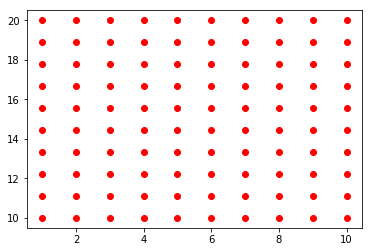

In [74]:
def cartesian2d(x, y):
    return np.stack(np.meshgrid(x, y), -1).reshape((-1,2))

a = cartesian2d(np.linspace(1, 10, 10), np.linspace(10, 20, 10))
plt.plot(a[:,0], a[:,1], 'ro')
plt.show()

In [86]:
S1r = np.linspace(S1-ds/2, S1+ds/2, n)
tr = np.linspace(t-dt/2, t+dt/2, n)

print(len(S1r))
print(len(tr))

def cartesian3d(x, y):
    return np.stack(np.meshgrid(x, y), -1).reshape((3, 30, 30))

a = cartesian3d(tr, S1r)
print(a.shape)

30
30


ValueError: cannot reshape array of size 5400 into shape (3,30,30)

In [110]:
ts = np.linspace(1, 10, 10)
ss = np.linspace(1, 10, 10)
ds = np.linspace(1, 10, 10)

uniq = []
gen_d = 0
gen_s = 0
comb = 0

for t in ts:
    for d in ds:
        for s in ss:
            gen_s += 1
            gen_d += 1
            comb += 1
            p = (t, d, s)
            if p not in uniq:
                uniq.append(p)
                
print('uniq %d' % len(uniq))
print('d    %d' % gen_d)
print('s    %d' % gen_s)
print('comb %d' % comb)

uniq 1000
d    1000
s    1000
comb 1000


In [114]:
ts = np.linspace(1, 10, 10)
ss = np.linspace(1, 10, 10)
ds = np.linspace(1, 10, 10)

uniq = []
gen_d = 0
gen_s = 0
comb = 0

for t in ts:
    d_ = []
    for d in ds:
        gen_d += 1
        d_.append(d)
    
    for s in ts:
        gen_s += 1
        
        for d in d_:            
            comb += 1
            p = (t, d, s)
            if p not in uniq:
                uniq.append(p)
                
print('uniq %d' % len(uniq))
print('d    %d' % gen_d)
print('s    %d' % gen_s)
print('comb %d' % comb)

uniq 1000
d    100
s    100
comb 1000


In [116]:
ts = np.linspace(1, 10, 10)
ss = np.linspace(1, 10, 10)
ds = np.linspace(1, 10, 10)


uniq = []
gen_d = 0
gen_s = 0
comb = 0

for s in ts:
    ts = np.linspace(s*1000+1, s*1000+10, 10)
    for t in ts:
        gen_s += 1
        for d in ds:
            gen_d += 1
            comb += 1
            p = (t, d, s)
            if p not in uniq:
                uniq.append(p)
                
print('uniq %d' % len(uniq))
print('d    %d' % gen_d)
print('s    %d' % gen_s)
print('comb %d' % comb)

uniq 1000
d    1000
s    100
comb 1000


In [148]:
start = 0.0
end = 50.0
step = 30
eps = 0.001

cnt = int((end-start) // step + 1)
last = start + (cnt - 1)*step
if abs(last - end) <= eps:
    mrng = start + np.array(range(cnt))*step
else:
    new_step = (end - start) / cnt
    mrng = start + np.array(range(cnt+1))*new_step
    #mrng = np.linspace(start, end, cnt)
    
rng = np.arange(start, end, step)

print(len(mrng))
print(len(rng))
print(rng)
print(mrng)

3
2
[ 0. 30.]
[ 0. 25. 50.]


In [124]:
np.range

AttributeError: 'module' object has no attribute 'range'